In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers,models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()


In [3]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [5]:
train_labels.shape

(60000,)

In [6]:
train_labels=to_categorical(train_labels)

In [7]:
test_labels=to_categorical(test_labels)

In [8]:
train_images=train_images.reshape((60000,28,28,1)).astype('float32')/255
test_images=test_images.reshape((10000,28,28,1)).astype('float32')/255

In [9]:
#model Building
model=models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

model.add(layers.Flatten())

model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))


In [10]:
model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [11]:
history=model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10


1875/1875 [==============================] - 34s 16ms/step - loss: 0.5011 - accuracy: 0.8169 - val_loss: 0.4396 - val_accuracy: 0.8504
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3225 - accuracy: 0.8821 - val_loss: 0.3094 - val_accuracy: 0.8871
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2790 - accuracy: 0.8969 - val_loss: 0.2884 - val_accuracy: 0.8934
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2533 - accuracy: 0.9057 - val_loss: 0.2899 - val_accuracy: 0.8976
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2274 - accuracy: 0.9166 - val_loss: 0.2617 - val_accuracy: 0.9032
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2077 - accuracy: 0.9225 - val_loss: 0.2850 - val_accuracy: 0.8993
Epoch 7/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1895 - accuracy: 0.9294 - val_loss: 0.2730

In [12]:
test_loss,test_accuracy=model.evaluate(test_images,test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.2793 - accuracy: 0.9055


In [14]:
import numpy as np
num_test_image =5
random_index=np.random.randint(0,len(test_images),num_test_image)


1/1 [==============================] - 0s 300ms/step


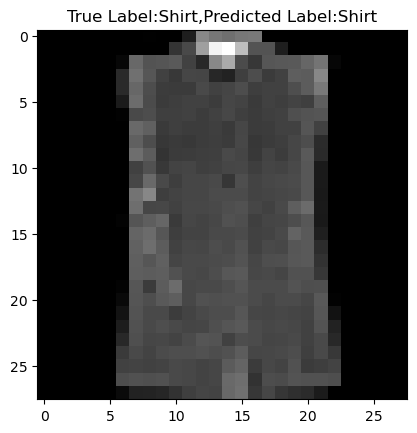

1/1 [==============================] - 0s 48ms/step


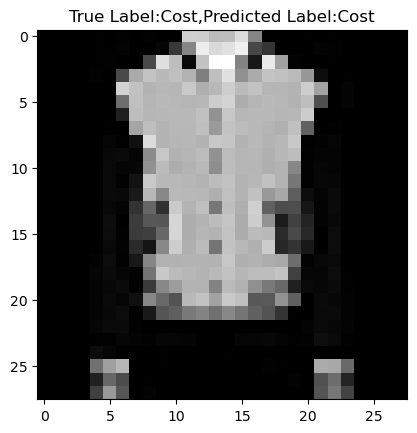

1/1 [==============================] - 0s 56ms/step


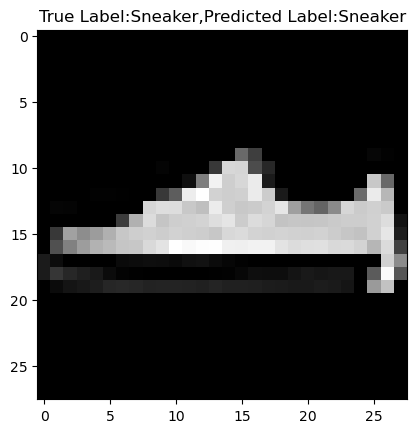

1/1 [==============================] - 0s 41ms/step


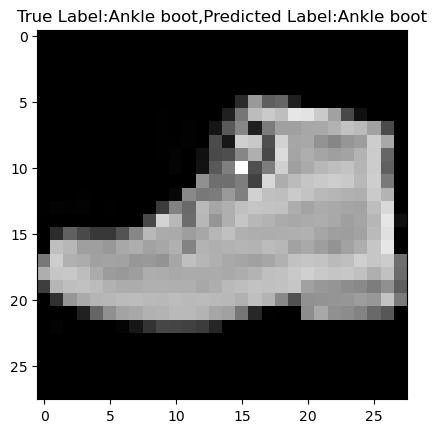

1/1 [==============================] - 0s 49ms/step


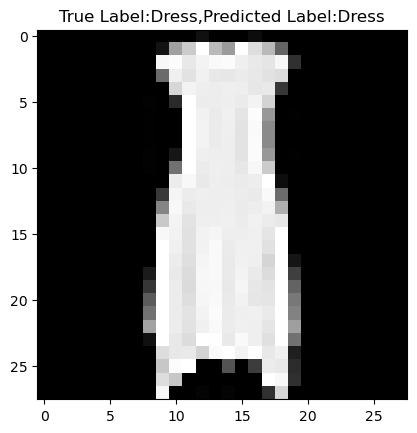

In [15]:
class_names=["T-shirt/top","Trouser","Pullover","Dress","Cost","sandal","Shirt","Sneaker","Bag","Ankle boot"]

for i in random_index:
    test_image=test_images[i]
    true_label=np.argmax(test_labels[i])
    true_label=class_names[true_label]
    
    test_image=test_image.reshape((1,28,28,1))
    predict_labels=np.argmax(model.predict(test_image))
    predict_labels=class_names[predict_labels]
    
    plt.figure()
    plt.imshow(test_image.reshape(28,28),cmap='gray')
    plt.title(f'True Label:{true_label},Predicted Label:{predict_labels}')
    plt.show()